# VelocityKernel vs. RealTimeKernel - TSI

## Library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import pandas as pd

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

from cr2.analysis import plot_tsi

sys.path.extend(["../../../", "."])
from paths import DATA_DIR, FIG_DIR  # isort: skip  # noqa: E402

Global seed set to 0


## General settings

In [3]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    (FIG_DIR / "realtime_kernel" / "pharyngeal_endoderm").mkdir(parents=True, exist_ok=True)

FIGURE_FORMAT = "pdf"

## Constants

## Data loading

In [4]:
tsi_cr1_full = pd.read_csv(DATA_DIR / "pharyngeal_endoderm" / "results" / "tsi-full_data-vk.csv")
tsi_cr1_full.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,20,4,11
1,19,4,11
2,18,4,11
3,17,4,11
4,16,4,11


In [5]:
tsi_cr1_subset = pd.read_csv(DATA_DIR / "pharyngeal_endoderm" / "results" / "tsi-subsetted_data-vk.csv")
tsi_cr1_subset.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,10,4,4
1,9,4,4
2,8,4,4
3,7,4,4
4,6,4,4


In [6]:
tsi_cr2_full = pd.read_csv(DATA_DIR / "pharyngeal_endoderm" / "results" / "tsi-full_data-rtk.csv")
tsi_cr2_full.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5


In [7]:
tsi_cr2_subset = pd.read_csv(DATA_DIR / "pharyngeal_endoderm" / "results" / "tsi-subsetted_data-rtk.csv")
tsi_cr2_subset.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,10,4,4
1,9,4,4
2,8,4,4
3,7,4,4
4,6,4,4


## Data preprocessing

In [8]:
tsi_cr1_full["method"] = "CellRank 1"
tsi_cr1_subset["method"] = "CellRank 1"

tsi_cr2_full["method"] = "CellRank 2"
tsi_cr2_subset["method"] = "CellRank 2"

df_full = pd.concat([tsi_cr1_full, tsi_cr2_full])
df_subset = pd.concat([tsi_cr1_subset, tsi_cr2_subset])

## Plotting

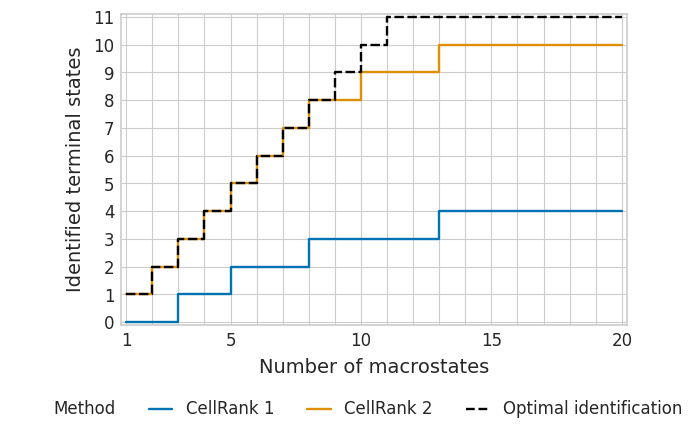

In [9]:
palette = {"CellRank 1": "#0173b2", "CellRank 2": "#DE8F05", "Optimal identification": "#000000"}

if SAVE_FIGURES:
    fname = FIG_DIR / "realtime_kernel" / "pharyngeal_endoderm" / f"tsi_ranking-full_data.{FIGURE_FORMAT}"
else:
    fname = None

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    plot_tsi(df=df_full, palette=palette, fname=fname)
    plt.show()

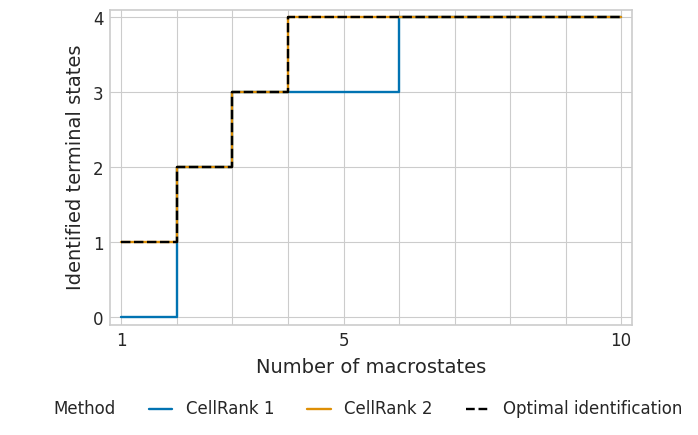

In [10]:
palette = {"CellRank 1": "#0173b2", "CellRank 2": "#DE8F05", "Optimal identification": "#000000"}

if SAVE_FIGURES:
    fname = FIG_DIR / "realtime_kernel" / "pharyngeal_endoderm" / f"tsi_ranking-subsetted_data.{FIGURE_FORMAT}"
else:
    fname = None

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    plot_tsi(df=df_subset, palette=palette, fname=fname)
    plt.show()